In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Train Data

In [69]:
train_df = pd.read_csv('train.csv', parse_dates=True)
train_df['time'] = pd.to_datetime(train_df['timestamp'], format="mixed", dayfirst=True)
train_df.head()

,timestamp,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,time
0,2023-03-25T13:26:05,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-190,-255,-13,2593,-7271,-2873,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.000
1,2023-03-25T13:26:05.020000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-119,-308,-15,2571,-7105,-2625,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.020
2,2023-03-25T13:26:05.040000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-167,-299,-33,2635,-7155,-2627,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.040
3,2023-03-25T13:26:05.060000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-202,-290,-50,2718,-7233,-2801,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.060
4,2023-03-25T13:26:05.080000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-86,-252,-44,2823,-7242,-2823,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.080


In [70]:
assetsList = train_df.asset_id.unique()
asset_dfList = {}
date_ranges = {}
for asset in assetsList:
    asset_df = train_df[train_df.asset_id == asset]
    date_range = pd.to_datetime(asset_df.timestamp.max()) - pd.to_datetime(asset_df.timestamp.min())
    start = asset_df.timestamp.min()
    end = asset_df.timestamp.max()
    date_ranges[asset] = (date_range, start, end)
    asset_dfList[asset] = asset_df

In [71]:
for assetDF in asset_dfList.keys():
    asset_dfList[assetDF]['magicIndicators2'] = 0
    if asset_dfList[assetDF].isna().sum()['indicator_2a'] == 0:
        asset_dfList[assetDF]['magicIndicators2'] = 1

/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/3945813020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_dfList[assetDF]['magicIndicators2'] = 0
/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/3945813020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_dfList[assetDF]['magicIndicators2'] = 0
/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/3945813020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [72]:
df = train_df.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df.set_index('timestamp', inplace=True)
df['magicIndicators2'] = 0
missing_count = df.groupby('asset_id').transform(lambda x: x.isna().sum())['indicator_2a']
df['magicIndicators2'] = (missing_count == 0).astype(int)
df

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,time,magicIndicators2
timestamp,,,,,,,,,,,,,,,,,,,,
2023-03-25 13:26:05.000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-190,-255,-13,2593,-7271,-2873,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.000,0
2023-03-25 13:26:05.020,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-119,-308,-15,2571,-7105,-2625,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.020,0
2023-03-25 13:26:05.040,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-167,-299,-33,2635,-7155,-2627,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.040,0
2023-03-25 13:26:05.060,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-202,-290,-50,2718,-7233,-2801,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.060,0
2023-03-25 13:26:05.080,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-86,-252,-44,2823,-7242,-2823,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 13:30:34.900,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,253,7748,-219,2736,-7945,-609,39,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:30:34.900,0
2023-03-25 13:30:34.920,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,253,7748,-219,2736,-7945,-609,39,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:30:34.920,0
2023-03-25 13:30:34.940,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,253,7748,-219,2736,-7945,-609,39,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:30:34.940,0


In [73]:
magic_indicators_1 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f']

magic_indicators_2 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f']

df_scaled = pd.DataFrame()

for asset in assetsList:
    df_asset = df[df['asset_id'] == asset].copy()
    
    if df_asset['magicIndicators2'].sum() ==0: #these dont have magic indicators set 2
        for indicator in magic_indicators_1:
            mean = df_asset[indicator].mean()
            sd = df_asset[indicator].std()
            df_asset[indicator] -= mean
            df_asset[indicator] /= sd
    else:
        for indicator in magic_indicators_2:
            mean = df_asset[indicator].mean()
            sd = df_asset[indicator].std()
            df_asset[indicator] -= mean
            df_asset[indicator] /= sd
    
    df_scaled = pd.concat([df_scaled, df_asset]) # type: ignore

df_scaled

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,time,magicIndicators2
timestamp,,,,,,,,,,,,,,,,,,,,
2023-03-25 13:26:05.000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.168144,-0.051937,0.015726,0.233157,0.083451,-0.245338,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.000,0
2023-03-25 13:26:05.020,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.120416,-0.084091,0.013413,0.226342,0.144338,-0.171193,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.020,0
2023-03-25 13:26:05.040,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.152683,-0.078631,-0.007399,0.246168,0.125999,-0.171790,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.040,0
2023-03-25 13:26:05.060,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.176210,-0.073171,-0.027055,0.271881,0.097389,-0.223812,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.060,0
2023-03-25 13:26:05.080,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.098233,-0.050117,-0.020118,0.304410,0.094088,-0.230389,31,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:26:05.080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 13:30:34.900,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:30:34.900,0
2023-03-25 13:30:34.920,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:30:34.920,0
2023-03-25 13:30:34.940,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-25 13:30:34.940,0


In [74]:
df_scaled.to_csv('df_scaled.csv', index=True)

In [75]:
df_scaled_0 = df_scaled[df_scaled['magicIndicators2']==0].copy()
df_scaled_0.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], axis=1, inplace=True)
df_scaled_0.to_csv('df_scaled_0.csv', index=True)
df_scaled_0

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,time
timestamp,,,,,,,,,,,,,
2023-03-25 13:26:05.000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.168144,-0.051937,0.015726,0.233157,0.083451,-0.245338,31,18,65,172,2023-03-25 13:26:05.000
2023-03-25 13:26:05.020,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.120416,-0.084091,0.013413,0.226342,0.144338,-0.171193,31,18,65,172,2023-03-25 13:26:05.020
2023-03-25 13:26:05.040,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.152683,-0.078631,-0.007399,0.246168,0.125999,-0.171790,31,18,65,172,2023-03-25 13:26:05.040
2023-03-25 13:26:05.060,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.176210,-0.073171,-0.027055,0.271881,0.097389,-0.223812,31,18,65,172,2023-03-25 13:26:05.060
2023-03-25 13:26:05.080,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.098233,-0.050117,-0.020118,0.304410,0.094088,-0.230389,31,18,65,172,2023-03-25 13:26:05.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 13:30:34.900,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.900
2023-03-25 13:30:34.920,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.920
2023-03-25 13:30:34.940,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.940


In [76]:
df_scaled_1 = df_scaled[df_scaled['magicIndicators2']==1].copy()
df_scaled_1.drop(['magicIndicators2'],axis=1,inplace=True)
df_scaled_1.to_csv('df_scaled_1.csv')
df_scaled_1

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,time
timestamp,,,,,,,,,,,,,,,,,,,
2023-02-27 19:45:01.000,b9a9903e-076e-4dbd-8ba3-d0603f8a774c,False,-0.063306,0.034901,-0.118947,0.379573,0.053587,-0.171470,17,15,57,180,0.113433,0.027157,-0.201179,0.315564,0.176717,-0.354412,2023-02-27 19:45:01.000
2023-02-27 19:45:01.020,b9a9903e-076e-4dbd-8ba3-d0603f8a774c,False,-0.063306,0.034901,-0.118947,0.379573,0.053587,-0.171470,17,15,57,180,0.113433,0.027157,-0.201179,0.315564,0.176717,-0.354412,2023-02-27 19:45:01.020
2023-02-27 19:45:01.040,b9a9903e-076e-4dbd-8ba3-d0603f8a774c,False,-0.063306,0.034901,-0.118947,0.379573,0.053587,-0.171470,17,15,57,180,0.113433,0.027157,-0.201179,0.315564,0.176717,-0.354412,2023-02-27 19:45:01.040
2023-02-27 19:45:01.060,b9a9903e-076e-4dbd-8ba3-d0603f8a774c,False,-0.063306,0.034901,-0.118947,0.379573,0.053587,-0.171470,17,15,57,180,0.113433,0.027157,-0.201179,0.315564,0.176717,-0.354412,2023-02-27 19:45:01.060
2023-02-27 19:45:01.080,b9a9903e-076e-4dbd-8ba3-d0603f8a774c,False,-0.063306,0.034901,-0.118947,0.379573,0.053587,-0.171470,17,15,57,180,0.113433,0.027157,-0.201179,0.315564,0.176717,-0.354412,2023-02-27 19:45:01.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 19:41:12.900,711c2bd5-0c5c-422d-97ec-da7ce93136a3,False,-0.655364,0.120194,-0.138331,-1.078103,-0.002550,0.022730,44,20,72,182,-0.240889,0.455514,0.112952,-0.809458,0.063072,1.835643,2023-02-24 19:41:12.900
2023-02-24 19:41:12.920,711c2bd5-0c5c-422d-97ec-da7ce93136a3,False,-0.597942,-0.282468,-0.187498,-1.113751,-0.012600,0.073467,44,20,72,182,-0.262884,0.356152,0.166235,-0.670450,0.049445,1.653404,2023-02-24 19:41:12.920
2023-02-24 19:41:12.940,711c2bd5-0c5c-422d-97ec-da7ce93136a3,False,-0.526514,-0.540715,-0.198970,-0.953337,-0.076014,0.164169,44,20,72,182,-0.382368,0.403965,0.153802,-0.530473,0.120368,1.545732,2023-02-24 19:41:12.940


## Model for `roi` in Test Data

In [26]:
class MainModel():
    def __init__(self, model1, model2):
        self.model1 = model1
        self.model2 = model2
    
    def fit(self, X, y):
        X_0 = X[X['magicIndicators2'] == 0].copy()
        y_0 = y[y.index.isin(X_0.index)].copy()
        X_0.drop(columns=['asset_id', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], inplace=True)

        X_1 = X[X['magicIndicators2'] == 1].copy()
        y_1 = y[y.index.isin(X_1.index)].copy()
        X_1.drop(columns=['asset_id', 'magicIndicators2'], inplace=True)
        
        self.model1.fit(X_0, y_0)
        self.model2.fit(X_1, y_1)
    
    def predict(self, X):

        y_pred = pd.DataFrame()

        for asset in list(X.asset_id.unique()):
            # Predict per asset
            assetDF = X[X['asset_id'] == asset].copy()
            assetDF.set_index('timestamp',inplace=True)
            assetDF.drop(columns=['asset_id'], inplace=True)

            if assetDF.magicIndicators2[0] == 0:
                assetDF.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], inplace=True)
                asset_pred = self.model1.predict(assetDF).astype(int)
            else:
                assetDF.drop(columns=['magicIndicators2'], inplace=True)
                asset_pred = self.model2.predict(assetDF)
            
            asset_pred_df = pd.DataFrame({'preds': asset_pred}, index=assetDF.index)
            asset_pred_df['asset_id'] = asset

            y_pred = pd.concat([y_pred, asset_pred_df], axis=0) 
        
        return y_pred

In [77]:
from sklearn.model_selection import train_test_split

# Step 1: Get unique asset IDs
unique_asset_ids_0 = list(df_scaled_0['asset_id'].unique())

# Step 2: Split asset IDs into train and validation sets
train_asset_ids_0, val_asset_ids_0 = train_test_split(unique_asset_ids_0, test_size=0.2, random_state=42)

# Step 3: Filter train data
train_data_0 = df_scaled_0[df_scaled_0['asset_id'].isin(train_asset_ids_0)]

# Step 4: Filter validation data
validation_data_0 = df_scaled_0[df_scaled_0['asset_id'].isin(val_asset_ids_0)]

In [78]:
train_data_0

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,time
timestamp,,,,,,,,,,,,,
2023-03-25 16:04:38.000,e927c440-3128-4087-8bc5-4ca80662ef63,False,1.297450,-0.181095,-1.321355,0.909208,-0.376856,-0.336248,22,14,62,176,2023-03-25 16:04:38.000
2023-03-25 16:04:38.020,e927c440-3128-4087-8bc5-4ca80662ef63,False,1.297450,-0.181095,-1.321355,0.909208,-0.376856,-0.336248,22,14,62,176,2023-03-25 16:04:38.020
2023-03-25 16:04:38.040,e927c440-3128-4087-8bc5-4ca80662ef63,False,0.831181,0.374168,-1.189351,0.725026,0.221115,-0.171122,22,14,62,176,2023-03-25 16:04:38.040
2023-03-25 16:04:38.060,e927c440-3128-4087-8bc5-4ca80662ef63,False,0.635601,0.762667,-1.044973,0.214285,0.423088,0.087840,22,14,62,176,2023-03-25 16:04:38.060
2023-03-25 16:04:38.080,e927c440-3128-4087-8bc5-4ca80662ef63,False,0.630396,1.189970,-0.745215,-0.494572,0.428717,0.201240,22,14,62,176,2023-03-25 16:04:38.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 13:30:34.900,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.900
2023-03-25 13:30:34.920,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.920
2023-03-25 13:30:34.940,8d4a0924-5c4e-4b69-b14f-615d867f06c6,False,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.940


In [29]:
features_0 = ['company_age', 'company_size', 'revenue', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f']

X_0_train = train_data_0[features_0]
y_0_train = train_data_0['roi']
X_0_valid = validation_data_0[features_0]
y_0_valid = validation_data_0['roi']

In [79]:
def create_sequences(data, labels, sequence_length):
    sequence_data = []
    sequence_labels = []
    for i in range(len(data) - sequence_length + 1):
        sequence_data.append(data[i : i + sequence_length])
        sequence_labels.append(labels[i : i + sequence_length])
    return np.array(sequence_data), np.array(sequence_labels)

In [81]:
df_scaled_0.roi = df_scaled_0.roi.astype(int)
df_scaled_0

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,time
timestamp,,,,,,,,,,,,,
2023-03-25 13:26:05.000,adb4f023-2f14-44eb-a4b8-9128f99f2286,0,-0.168144,-0.051937,0.015726,0.233157,0.083451,-0.245338,31,18,65,172,2023-03-25 13:26:05.000
2023-03-25 13:26:05.020,adb4f023-2f14-44eb-a4b8-9128f99f2286,0,-0.120416,-0.084091,0.013413,0.226342,0.144338,-0.171193,31,18,65,172,2023-03-25 13:26:05.020
2023-03-25 13:26:05.040,adb4f023-2f14-44eb-a4b8-9128f99f2286,0,-0.152683,-0.078631,-0.007399,0.246168,0.125999,-0.171790,31,18,65,172,2023-03-25 13:26:05.040
2023-03-25 13:26:05.060,adb4f023-2f14-44eb-a4b8-9128f99f2286,0,-0.176210,-0.073171,-0.027055,0.271881,0.097389,-0.223812,31,18,65,172,2023-03-25 13:26:05.060
2023-03-25 13:26:05.080,adb4f023-2f14-44eb-a4b8-9128f99f2286,0,-0.098233,-0.050117,-0.020118,0.304410,0.094088,-0.230389,31,18,65,172,2023-03-25 13:26:05.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 13:30:34.900,8d4a0924-5c4e-4b69-b14f-615d867f06c6,0,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.900
2023-03-25 13:30:34.920,8d4a0924-5c4e-4b69-b14f-615d867f06c6,0,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.920
2023-03-25 13:30:34.940,8d4a0924-5c4e-4b69-b14f-615d867f06c6,0,0.027261,2.441767,-0.231956,0.208894,-0.110680,0.303776,39,18,65,172,2023-03-25 13:30:34.940


In [85]:
def generate_data(df, sequence_length):
    # Create sequences for each asset
    X = []
    y = []
    for asset in list(df['asset_id'].unique()):
        asset_data = df[df['asset_id'] == asset]
        asset_data_sequences, asset_labels_sequences = create_sequences(
            asset_data[['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f']].values,
            asset_data['roi'].values,
            sequence_length
        )
        X.append(asset_data_sequences)
        y.append(asset_labels_sequences)

    # Convert lists to arrays
    X = np.concatenate(X, axis=0)
    y = np.concatenate(y, axis=0)
    return X, y


In [90]:
for asset in list(df_scaled_0['asset_id'].unique()):
    df_scaled_0_asset = df_scaled_0[df_scaled_0['asset_id'] == asset]
    print(df_scaled_0_asset.roi.value_counts())

roi
0    1172
1      78
Name: count, dtype: int64
roi
0    968
1     82
Name: count, dtype: int64
roi
0    613
1     87
Name: count, dtype: int64
roi
0    576
1     74
Name: count, dtype: int64
roi
0    671
1     79
Name: count, dtype: int64
roi
0    570
1     80
Name: count, dtype: int64
roi
0    724
1     76
Name: count, dtype: int64
roi
0    731
1     69
Name: count, dtype: int64
roi
0    620
1     80
Name: count, dtype: int64
roi
0    870
1     80
Name: count, dtype: int64
roi
0    576
1     74
Name: count, dtype: int64
roi
0    578
1     72
Name: count, dtype: int64
roi
0    714
1     86
Name: count, dtype: int64
roi
0    631
1     69
Name: count, dtype: int64
roi
0    614
1     86
Name: count, dtype: int64
roi
0    586
1     64
Name: count, dtype: int64
roi
0    603
1     97
Name: count, dtype: int64
roi
0    1272
1      78
Name: count, dtype: int64
roi
0    867
1     83
Name: count, dtype: int64
roi
0    677
1     73
Name: count, dtype: int64


In [98]:
X_train, y_train = generate_data(train_data_0, 50)

In [99]:
X_train.shape

(11116, 50, 6)

In [100]:
X_valid, y_valid = generate_data(validation_data_0, 50)

In [101]:
X_valid.shape

(4104, 50, 6)

In [104]:
y_train.shape

(11116, 50)

In [108]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train = [to_categorical(y_i, num_classes=2) for y_i in y_train]
y_valid = [to_categorical(y_i, num_classes=2) for y_i in y_valid]

y_train = np.array(y_train)
y_valid = np.array(y_valid)


In [106]:
y_train.shape

(11116, 50, 2)

In [109]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed
from keras.optimizers.legacy import Adam

# Define the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(2, activation='softmax')))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
348/348 [==============================] - 14s 32ms/step - loss: 0.1392 - accuracy: 0.9632 - val_loss: 0.1037 - val_accuracy: 0.9732
Epoch 2/20
348/348 [==============================] - 10s 28ms/step - loss: 0.0609 - accuracy: 0.9829 - val_loss: 0.0852 - val_accuracy: 0.9784
Epoch 3/20
348/348 [==============================] - 10s 28ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.0873 - val_accuracy: 0.9751
Epoch 4/20
348/348 [==============================] - 10s 28ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0865 - val_accuracy: 0.9775
Epoch 5/20
348/348 [==============================] - 10s 28ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0932 - val_accuracy: 0.9788
Epoch 6/20
348/348 [==============================] - 10s 28ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0957 - val_accuracy: 0.9772
Epoch 7/20
348/348 [==============================] - 10s 28ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.1004 - val_accuracy:

21/32 [==================>...........] - ETA: 0s

/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/2432441774.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data['roi_predicted'] = asset_data_pred_mapped


19/19 [==============================] - 0s 8ms/step


/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/2432441774.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data['roi_predicted'] = asset_data_pred_mapped
/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/2432441774.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data['roi_predicted'] = asset_data_pred_mapped


41/41 [==============================] - 0s 10ms/step


/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/2432441774.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data['roi_predicted'] = asset_data_pred_mapped


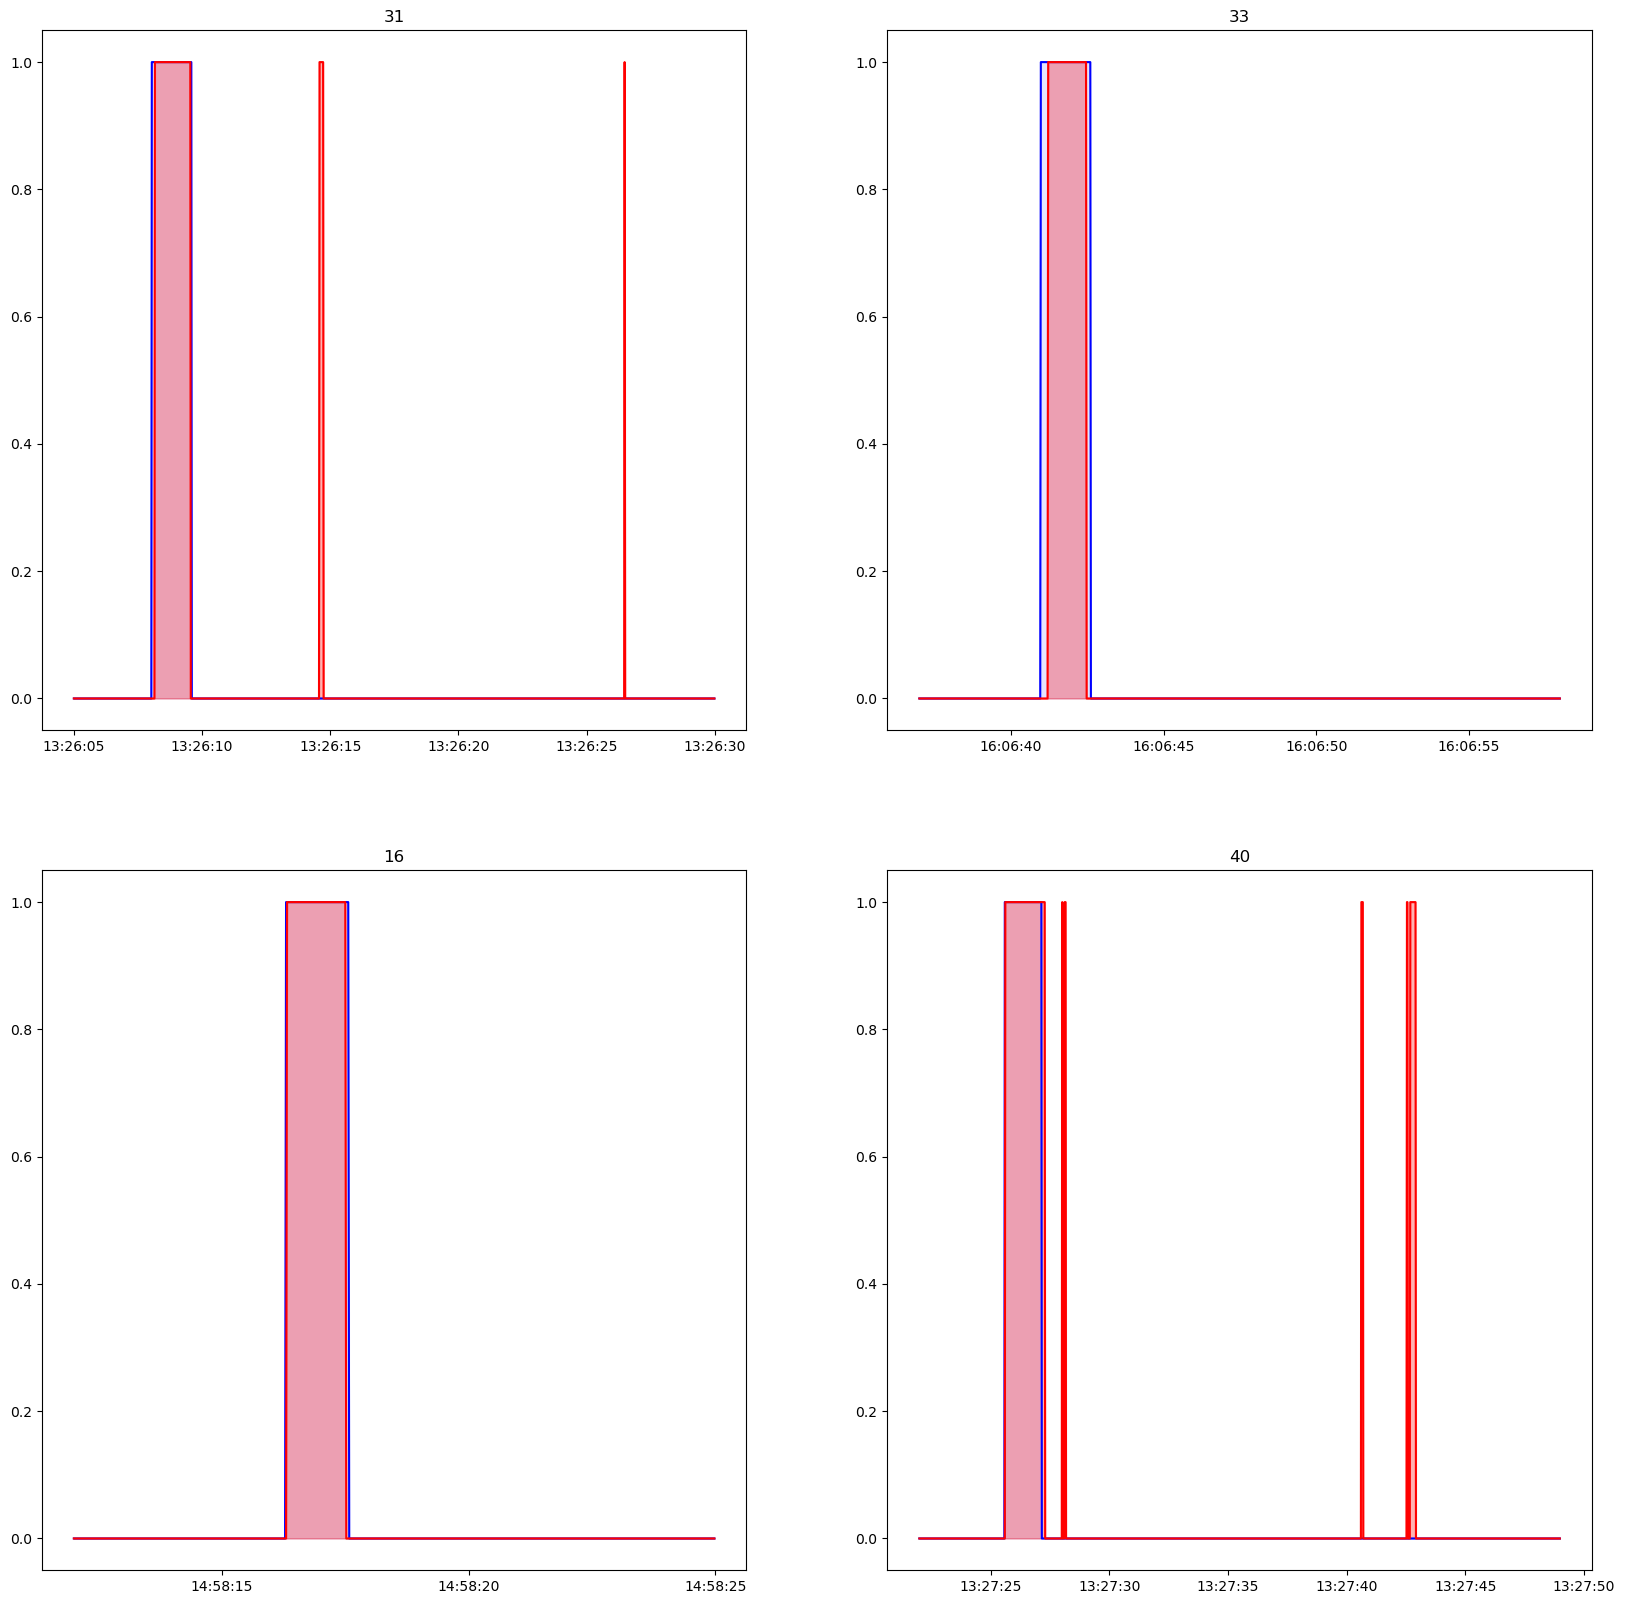

In [164]:
def map_predictions_to_timesteps(X, y_pred, sequence_length):
    num_samples = X.shape[0] + sequence_length - 1
    all_preds = np.zeros((num_samples,))

    for i, y_i in enumerate(y_pred):
        all_preds[i : i + sequence_length] += y_i

    # Average the predictions for each timestep and round to nearest integer
    y_mapped = np.round(all_preds / sequence_length)

    return y_mapped

def map_predictions_to_timesteps_withthreshold(X, y_pred, sequence_length, threshold):
    num_samples = X.shape[0] + sequence_length - 1
    all_preds = np.zeros((num_samples,))

    for i, y_i in enumerate(y_pred):
        all_preds[i : i + sequence_length] += y_i

    # Average the predictions for each timestep and apply threshold
    y_mapped = (all_preds / sequence_length) >= threshold

    # Convert boolean values to integer
    y_mapped = y_mapped.astype(int)

    return y_mapped

final_data = pd.DataFrame()
for asset_id in list(validation_data_0.asset_id.unique()):
    asset_data = validation_data_0[validation_data_0.asset_id == asset_id].copy()
    asset_data_X, asset_data_y = generate_data(asset_data, 50)
    asset_data_pred = model.predict(asset_data_X)
    asset_data_pred = np.argmax(asset_data_pred, axis=-1)
    asset_data_pred_mapped = map_predictions_to_timesteps_withthreshold(asset_data_X, asset_data_pred, sequence_length=50, threshold=0.56)
    asset_data_pred_mapped = asset_data_pred_mapped[:len(asset_data)]
    asset_data_pred_mapped = np.concatenate((asset_data_pred_mapped, np.zeros(len(asset_data) - len(asset_data_pred_mapped))))
    asset_data['roi_predicted'] = asset_data_pred_mapped
    final_data = pd.concat([final_data, asset_data])


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, asset in enumerate(final_data.asset_id.unique()):
    roi_data = final_data[final_data.asset_id == asset].copy()
    return_on_asset = list(roi_data.return_on_asset)[0]
    # roi_data.set_index('timestamp', inplace=True)
    axes.flatten()[i].plot(roi_data.roi, color='b')
    axes.flatten()[i].fill_between(roi_data.index, roi_data.roi, color='b', alpha=0.1)
    axes.flatten()[i].plot(roi_data.roi_predicted, color='r')
    axes.flatten()[i].fill_between(roi_data.index, roi_data.roi_predicted, color='r', alpha=0.3)
    axes.flatten()[i].set_title(return_on_asset)


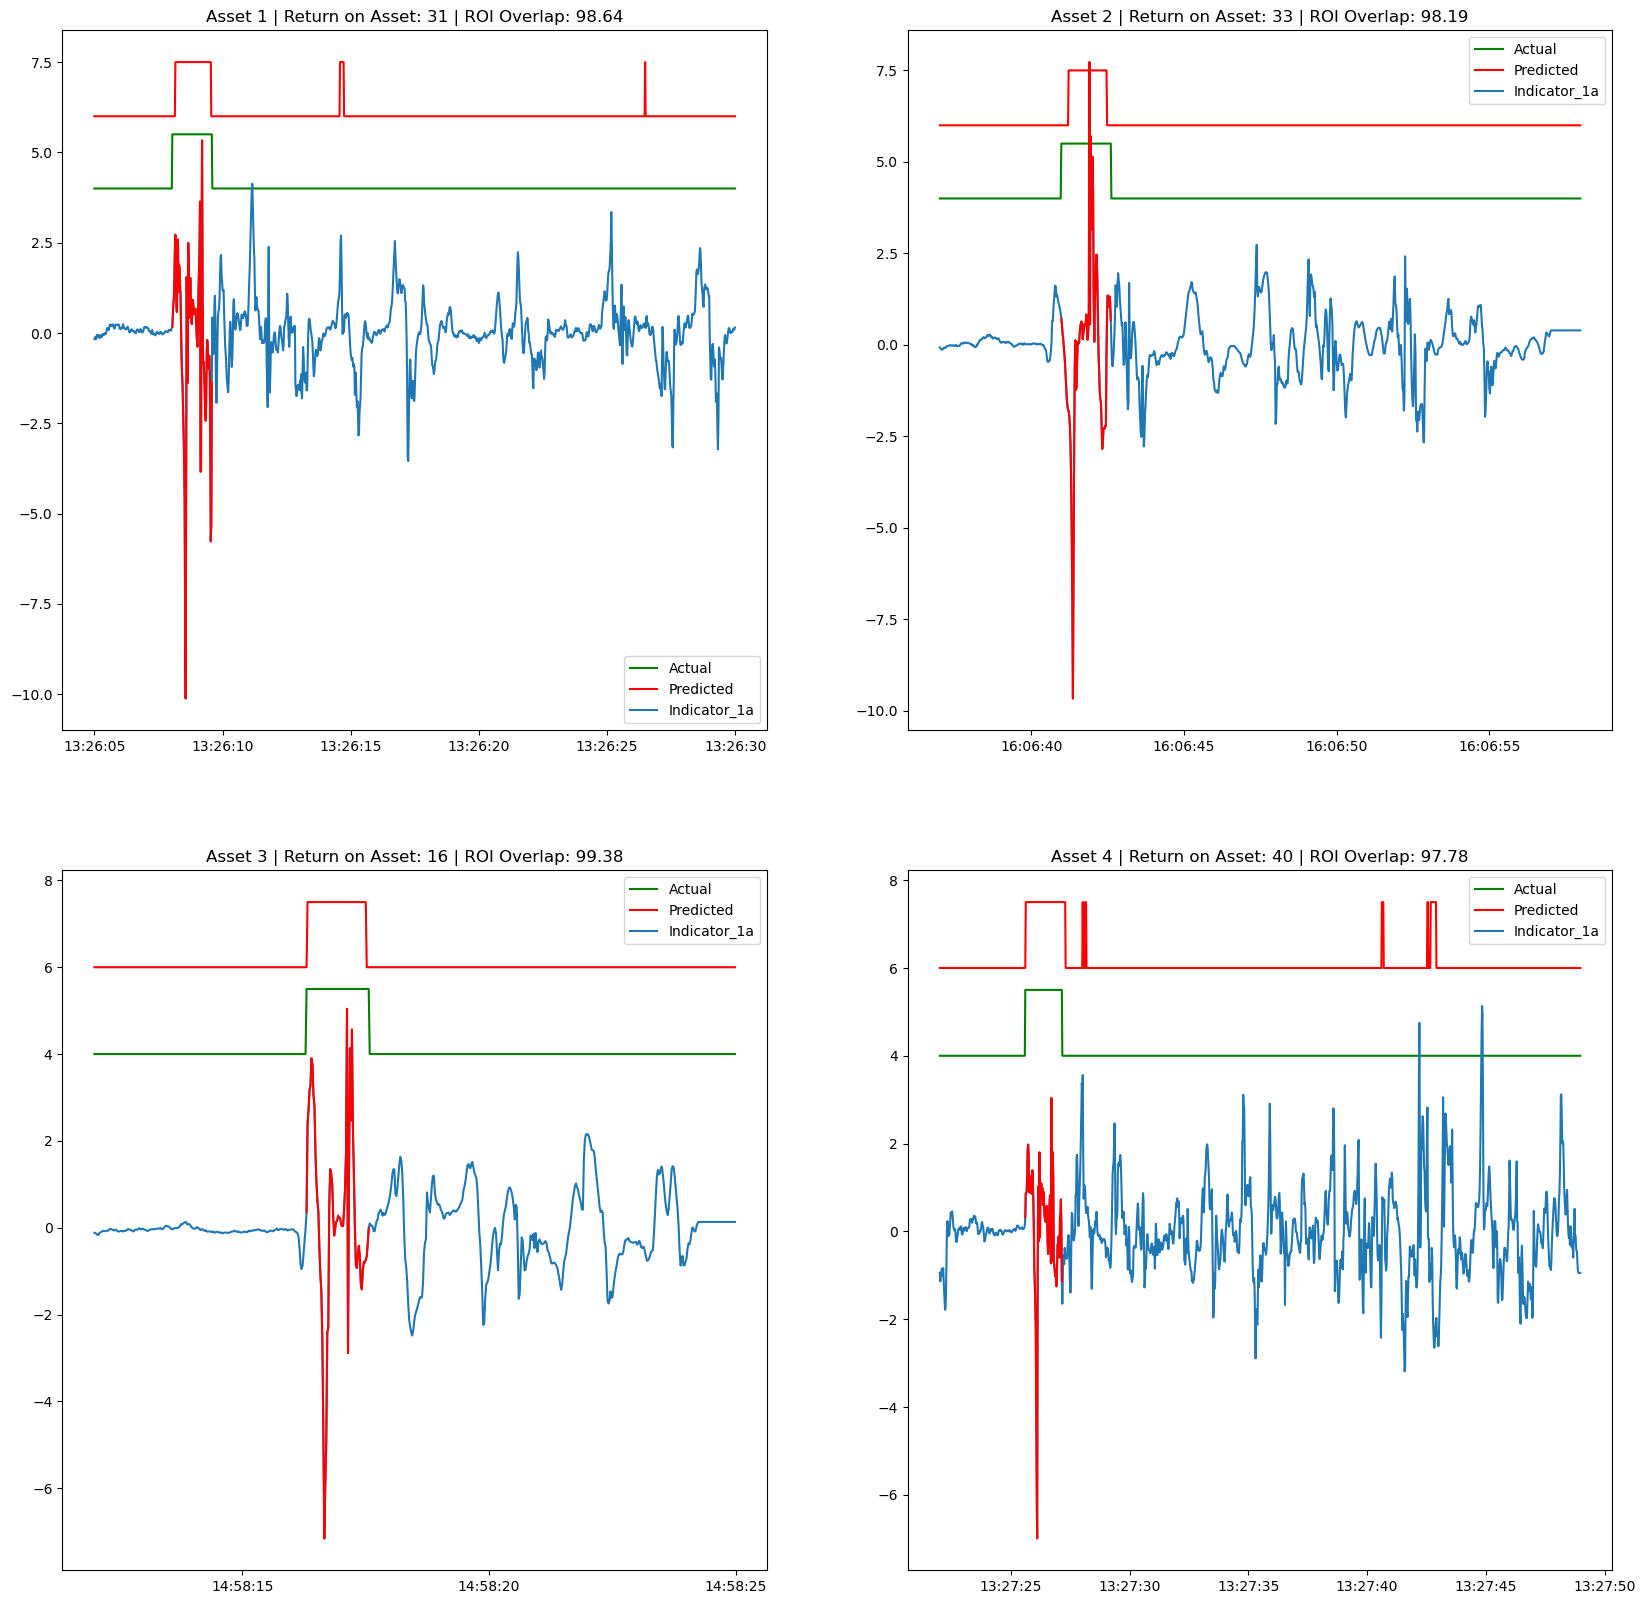

In [203]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, asset in enumerate(final_data.asset_id.unique()):
    roi_data = final_data[final_data.asset_id == asset].copy()
    return_on_asset = list(roi_data.return_on_asset)[0]
    roi_data.roi = roi_data.roi.astype(int)
    roi_overlap = (len(roi_data[roi_data.roi==roi_data.roi_predicted]) / len(roi_data))*100
    roi_overlap = f'{roi_overlap:.2f}'
    roi_data.roi = roi_data.roi.replace({0:4, 1:5.5})
    roi_data.roi_predicted = roi_data.roi_predicted.replace({0:6, 1:7.5})
    
    axes.flatten()[i].plot(roi_data.roi, color='g')
    axes.flatten()[i].plot(roi_data.roi_predicted, color='r')
    axes.flatten()[i].plot(roi_data.indicator_1a)
    axes.flatten()[i].plot(roi_data[roi_data.roi==5.5]['indicator_1a'], color='r')
    # axes.flatten()[i].plot(roi_data[roi_data.roi_predicted==7.5]['indicator_1a'], color='r')
    axes.flatten()[i].set_title('Asset ' + str(i+1) + ' | Return on Asset: ' + str(return_on_asset) + ' | ROI Overlap: ' + str(roi_overlap))
    axes.flatten()[i].legend(['Actual', 'Predicted', 'Indicator_1a'])

In [110]:
import numpy as np
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=-1)

129/129 [==============================] - 1s 8ms/step


In [112]:
y_pred.shape

(4104, 50)

In [133]:
def map_predictions_to_timesteps(X, y_pred, sequence_length):
    num_samples = X.shape[0] + sequence_length - 1
    all_preds = np.zeros((num_samples,))

    for i, y_i in enumerate(y_pred):
        all_preds[i : i + sequence_length] += y_i

    # Average the predictions for each timestep and round to nearest integer
    y_mapped = np.round(all_preds / sequence_length)

    return y_mapped

In [134]:
# Assume X_valid and y_pred are your validation data and predictions
y_valid_mapped = map_predictions_to_timesteps(X_valid, y_pred, sequence_length=50)

# If you only want to keep the predictions for the original timesteps:
y_valid_mapped = y_valid_mapped[:len(validation_data_0)]


In [136]:
y_valid_mapped.shape

(4153,)

In [141]:
y_valid_mapped = np.concatenate((y_valid_mapped, np.zeros(147)))
y_valid_mapped.shape

(4300,)

In [142]:
validation_data_0['roi_predicted'] = y_valid_mapped
validation_data_0

/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_81966/1437227287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data_0['roi_predicted'] = y_valid_mapped


,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,time,roi_predicted
timestamp,,,,,,,,,,,,,,
2023-03-25 13:26:05.000,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.168144,-0.051937,0.015726,0.233157,0.083451,-0.245338,31,18,65,172,2023-03-25 13:26:05.000,0.0
2023-03-25 13:26:05.020,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.120416,-0.084091,0.013413,0.226342,0.144338,-0.171193,31,18,65,172,2023-03-25 13:26:05.020,0.0
2023-03-25 13:26:05.040,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.152683,-0.078631,-0.007399,0.246168,0.125999,-0.171790,31,18,65,172,2023-03-25 13:26:05.040,0.0
2023-03-25 13:26:05.060,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.176210,-0.073171,-0.027055,0.271881,0.097389,-0.223812,31,18,65,172,2023-03-25 13:26:05.060,0.0
2023-03-25 13:26:05.080,adb4f023-2f14-44eb-a4b8-9128f99f2286,False,-0.098233,-0.050117,-0.020118,0.304410,0.094088,-0.230389,31,18,65,172,2023-03-25 13:26:05.080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 13:27:48.900,156f1f38-b84a-4660-b8be-9958338a7b73,False,-0.945122,0.097202,0.142781,0.093223,0.142832,1.526031,40,18,65,172,2023-03-25 13:27:48.900,0.0
2023-03-25 13:27:48.920,156f1f38-b84a-4660-b8be-9958338a7b73,False,-0.945122,0.097202,0.142781,0.093223,0.142832,1.526031,40,18,65,172,2023-03-25 13:27:48.920,0.0
2023-03-25 13:27:48.940,156f1f38-b84a-4660-b8be-9958338a7b73,False,-0.945122,0.097202,0.142781,0.093223,0.142832,1.526031,40,18,65,172,2023-03-25 13:27:48.940,0.0


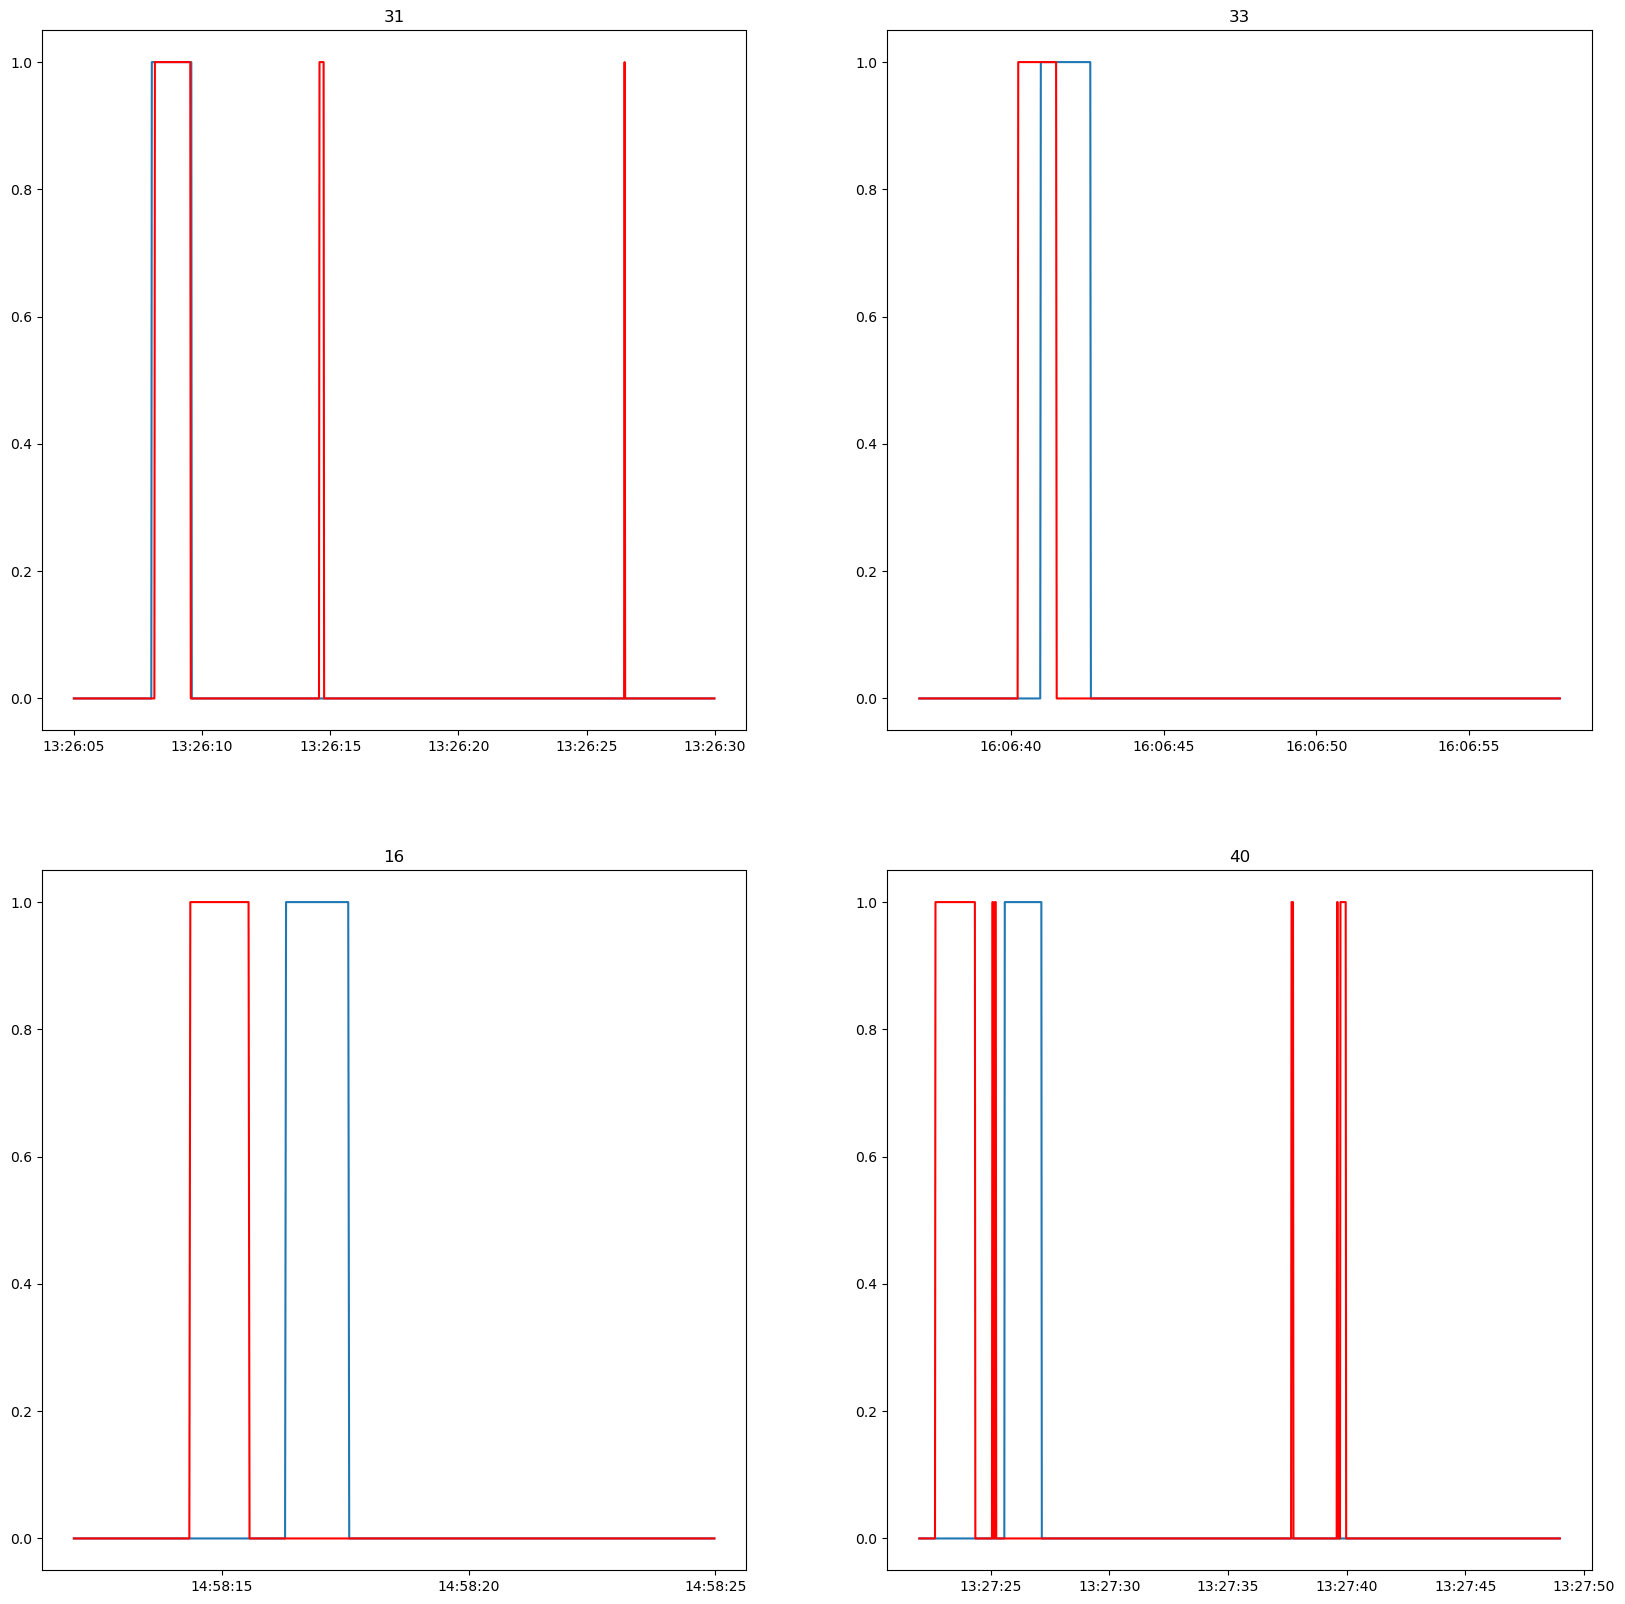

In [146]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, asset in enumerate(validation_data_0.asset_id.unique()):
    roi_data = validation_data_0[validation_data_0.asset_id == asset].copy()
    return_on_asset = list(roi_data.return_on_asset)[0]
    # roi_data.set_index('timestamp', inplace=True)
    axes.flatten()[i].plot(roi_data.roi)
    axes.flatten()[i].plot(roi_data.roi_predicted, color='r')
    axes.flatten()[i].set_title(return_on_asset)

In [38]:
from sklearn.model_selection import train_test_split

# Step 1: Get unique asset IDs
unique_asset_ids_1 = list(df_scaled_1['asset_id'].unique())

# Step 2: Split asset IDs into train and validation sets
train_asset_ids_1, val_asset_ids_1 = train_test_split(unique_asset_ids_1, test_size=0.2, random_state=42)

# Step 3: Filter train data
train_data_1 = df_scaled_1[df_scaled_1['asset_id'].isin(train_asset_ids_1)]

# Step 4: Filter validation data
validation_data_1 = df_scaled_1[df_scaled_1['asset_id'].isin(val_asset_ids_1)]

In [39]:
train_data_1

,asset_id,roi,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,return_on_asset,company_age,company_size,revenue,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,time
timestamp,,,,,,,,,,,,,,,,,,,
2023-03-24 18:37:55.000,8a3d7824-1707-42a4-9ce5-5a52b1b12a00,False,-0.286789,-1.434651,0.322053,2.239644,-0.672593,0.665249,34,16,69,177,-0.104207,-0.629724,1.441917,-0.198431,-0.207651,-0.226193,2023-03-24 18:37:55.000
2023-03-24 18:37:55.020,8a3d7824-1707-42a4-9ce5-5a52b1b12a00,False,0.068323,0.280198,1.151017,1.823099,-0.374627,1.194809,34,16,69,177,-0.136466,-0.661190,1.459644,-0.149170,-0.151353,-0.190410,2023-03-24 18:37:55.020
2023-03-24 18:37:55.040,8a3d7824-1707-42a4-9ce5-5a52b1b12a00,False,0.095294,1.329002,2.229059,0.260112,-0.571314,0.699866,34,16,69,177,-0.204824,-0.677400,1.490666,-0.154301,-0.105951,-0.215244,2023-03-24 18:37:55.040
2023-03-24 18:37:55.060,8a3d7824-1707-42a4-9ce5-5a52b1b12a00,False,-0.039559,1.024092,2.643541,-0.543614,-0.274449,0.438786,34,16,69,177,-0.249372,-0.608747,1.560096,-0.280876,-0.074351,-0.232335,2023-03-24 18:37:55.060
2023-03-24 18:37:55.080,8a3d7824-1707-42a4-9ce5-5a52b1b12a00,False,-0.092216,-1.182722,2.048088,0.747549,-0.298668,0.205452,34,16,69,177,-0.247836,-0.526745,1.622140,-0.386242,-0.009699,-0.193614,2023-03-24 18:37:55.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 19:41:12.900,711c2bd5-0c5c-422d-97ec-da7ce93136a3,False,-0.655364,0.120194,-0.138331,-1.078103,-0.002550,0.022730,44,20,72,182,-0.240889,0.455514,0.112952,-0.809458,0.063072,1.835643,2023-02-24 19:41:12.900
2023-02-24 19:41:12.920,711c2bd5-0c5c-422d-97ec-da7ce93136a3,False,-0.597942,-0.282468,-0.187498,-1.113751,-0.012600,0.073467,44,20,72,182,-0.262884,0.356152,0.166235,-0.670450,0.049445,1.653404,2023-02-24 19:41:12.920
2023-02-24 19:41:12.940,711c2bd5-0c5c-422d-97ec-da7ce93136a3,False,-0.526514,-0.540715,-0.198970,-0.953337,-0.076014,0.164169,44,20,72,182,-0.382368,0.403965,0.153802,-0.530473,0.120368,1.545732,2023-02-24 19:41:12.940


In [40]:
features_1 = ['company_age', 'company_size', 'revenue', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f']

X_1_train = train_data_1[features_1]
y_1_train = train_data_1['roi']
X_1_valid = validation_data_1[features_1]
y_1_valid = validation_data_1['roi']

## Test Data

In [49]:
test_df = pd.read_csv('test.csv', parse_dates=True)
test_df.head()

,timestamp,asset_id,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f
0,2023-02-27T19:50:13,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955
1,2023-02-27T19:50:13.020000,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955
2,2023-02-27T19:50:13.040000,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955
3,2023-02-27T19:50:13.060000,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955
4,2023-02-27T19:50:13.080000,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955


In [50]:
df_test = test_df.copy()
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], format='mixed')
df_test['magicIndicators2'] = 0
missing_count = df_test.groupby('asset_id').transform(lambda x: x.isna().sum())['indicator_2a']
df_test['magicIndicators2'] = (missing_count == 0).astype(int)
df_test

,timestamp,asset_id,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,magicIndicators2
0,2023-02-27 19:50:13.000,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955,1
1,2023-02-27 19:50:13.020,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955,1
2,2023-02-27 19:50:13.040,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955,1
3,2023-02-27 19:50:13.060,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955,1
4,2023-02-27 19:50:13.080,625efa066c0c4b0db60fdde37ee69dd1,-535.0,112.0,-61.0,-1606.0,-8119.0,-577.0,15,57,180,-80,77,1,1214,-8221,-955,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,2023-02-27 18:56:30.900,c5fcc8c3bf1243afbcfda8a21c797ea1,790.0,-276.0,200.0,-1248.0,-8465.0,409.0,18,59,182,309,-211,-209,11,-7874,-2610,1
24496,2023-02-27 18:56:30.920,c5fcc8c3bf1243afbcfda8a21c797ea1,968.0,-457.0,221.0,-1472.0,-8388.0,798.0,18,59,182,323,-272,-207,361,-7854,-2286,1
24497,2023-02-27 18:56:30.940,c5fcc8c3bf1243afbcfda8a21c797ea1,1148.0,-641.0,262.0,-1769.0,-8284.0,1270.0,18,59,182,344,-321,-138,405,-7694,-2006,1
24498,2023-02-27 18:56:30.960,c5fcc8c3bf1243afbcfda8a21c797ea1,1327.0,-803.0,290.0,-1992.0,-8088.0,1670.0,18,59,182,212,-251,-66,37,-7833,-2166,1


In [51]:
from sklearn.preprocessing import StandardScaler

magic_indicators_1 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f']

magic_indicators_2 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f']

df_test_scaled = pd.DataFrame()

for asset in list(df_test['asset_id'].unique()):
    df_asset = df_test[df_test['asset_id'] == asset].copy()
    
    if df_asset['magicIndicators2'].sum() ==0: #these dont have magic indicators set 2
        for indicator in magic_indicators_1:
            mean = df_asset[indicator].mean()
            sd = df_asset[indicator].std()
            df_asset[indicator] -= mean
            df_asset[indicator] /= sd
    else:
        for indicator in magic_indicators_2:
            mean = df_asset[indicator].mean()
            sd = df_asset[indicator].std()
            df_asset[indicator] -= mean
            df_asset[indicator] /= sd
    
    df_test_scaled = pd.concat([df_test_scaled, df_asset]) # type: ignore
    
df_test_scaled

,timestamp,asset_id,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,magicIndicators2
0,2023-02-27 19:50:13.000,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
1,2023-02-27 19:50:13.020,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
2,2023-02-27 19:50:13.040,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
3,2023-02-27 19:50:13.060,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
4,2023-02-27 19:50:13.080,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,2023-02-27 18:56:30.900,c5fcc8c3bf1243afbcfda8a21c797ea1,0.558088,-0.178084,0.387816,-0.289969,-0.153089,0.281498,18,59,182,0.234085,-0.150840,-0.287081,-0.380945,0.007483,-0.400903,1
24496,2023-02-27 18:56:30.920,c5fcc8c3bf1243afbcfda8a21c797ea1,0.696806,-0.279204,0.422647,-0.393284,-0.125936,0.411527,18,59,182,0.244551,-0.182564,-0.284270,-0.235793,0.014660,-0.292469,1
24497,2023-02-27 18:56:30.940,c5fcc8c3bf1243afbcfda8a21c797ea1,0.837082,-0.381999,0.490650,-0.530268,-0.089262,0.569301,18,59,182,0.260251,-0.208047,-0.187316,-0.217546,0.072078,-0.198761,1
24498,2023-02-27 18:56:30.960,c5fcc8c3bf1243afbcfda8a21c797ea1,0.976579,-0.472504,0.537092,-0.633122,-0.020145,0.703007,18,59,182,0.161567,-0.171643,-0.086147,-0.370162,0.022196,-0.252308,1


### Predicting `roi` in Test Data

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create instance of MainModel with Logistic Regression and Decision Tree models
mainModel = MainModel(clf_0_full, xgb_clf_1_full)

In [53]:
features_train = ['asset_id', 'company_age', 'company_size', 'revenue' ,'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f', 'magicIndicators2']

X_train = df_scaled[features_train].fillna(0).copy()
y_train = df_scaled['roi'].copy()

In [54]:
mainModel.fit(X_train, y_train)

In [55]:
features_test = ['timestamp', 'asset_id', 'company_age', 'company_size', 'revenue' ,'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f', 'magicIndicators2']
data_test = df_test_scaled[features_test].fillna(0).copy()

y_pred_test = mainModel.predict(data_test)
y_pred_test

,preds,asset_id
timestamp,,
2023-02-27 19:50:13.000,0,625efa066c0c4b0db60fdde37ee69dd1
2023-02-27 19:50:13.020,0,625efa066c0c4b0db60fdde37ee69dd1
2023-02-27 19:50:13.040,0,625efa066c0c4b0db60fdde37ee69dd1
2023-02-27 19:50:13.060,0,625efa066c0c4b0db60fdde37ee69dd1
2023-02-27 19:50:13.080,0,625efa066c0c4b0db60fdde37ee69dd1
...,...,...
2023-02-27 18:56:30.900,0,c5fcc8c3bf1243afbcfda8a21c797ea1
2023-02-27 18:56:30.920,0,c5fcc8c3bf1243afbcfda8a21c797ea1
2023-02-27 18:56:30.940,0,c5fcc8c3bf1243afbcfda8a21c797ea1


In [56]:
y_pred_test.reset_index(inplace=True)
y_pred_test

,timestamp,preds,asset_id
0,2023-02-27 19:50:13.000,0,625efa066c0c4b0db60fdde37ee69dd1
1,2023-02-27 19:50:13.020,0,625efa066c0c4b0db60fdde37ee69dd1
2,2023-02-27 19:50:13.040,0,625efa066c0c4b0db60fdde37ee69dd1
3,2023-02-27 19:50:13.060,0,625efa066c0c4b0db60fdde37ee69dd1
4,2023-02-27 19:50:13.080,0,625efa066c0c4b0db60fdde37ee69dd1
...,...,...,...
24495,2023-02-27 18:56:30.900,0,c5fcc8c3bf1243afbcfda8a21c797ea1
24496,2023-02-27 18:56:30.920,0,c5fcc8c3bf1243afbcfda8a21c797ea1
24497,2023-02-27 18:56:30.940,0,c5fcc8c3bf1243afbcfda8a21c797ea1
24498,2023-02-27 18:56:30.960,0,c5fcc8c3bf1243afbcfda8a21c797ea1


In [57]:
final_test_data = df_test_scaled.copy()
final_test_data

,timestamp,asset_id,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,magicIndicators2
0,2023-02-27 19:50:13.000,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
1,2023-02-27 19:50:13.020,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
2,2023-02-27 19:50:13.040,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
3,2023-02-27 19:50:13.060,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
4,2023-02-27 19:50:13.080,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,2023-02-27 18:56:30.900,c5fcc8c3bf1243afbcfda8a21c797ea1,0.558088,-0.178084,0.387816,-0.289969,-0.153089,0.281498,18,59,182,0.234085,-0.150840,-0.287081,-0.380945,0.007483,-0.400903,1
24496,2023-02-27 18:56:30.920,c5fcc8c3bf1243afbcfda8a21c797ea1,0.696806,-0.279204,0.422647,-0.393284,-0.125936,0.411527,18,59,182,0.244551,-0.182564,-0.284270,-0.235793,0.014660,-0.292469,1
24497,2023-02-27 18:56:30.940,c5fcc8c3bf1243afbcfda8a21c797ea1,0.837082,-0.381999,0.490650,-0.530268,-0.089262,0.569301,18,59,182,0.260251,-0.208047,-0.187316,-0.217546,0.072078,-0.198761,1
24498,2023-02-27 18:56:30.960,c5fcc8c3bf1243afbcfda8a21c797ea1,0.976579,-0.472504,0.537092,-0.633122,-0.020145,0.703007,18,59,182,0.161567,-0.171643,-0.086147,-0.370162,0.022196,-0.252308,1


In [58]:
final_test_data = pd.merge(final_test_data, y_pred_test, on = ['timestamp', 'asset_id'], how='left')
final_test_data.rename(columns={'preds': 'roi'}, inplace=True)
final_test_data

,timestamp,asset_id,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,magicIndicators2,roi
0,2023-02-27 19:50:13.000,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1,0
1,2023-02-27 19:50:13.020,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1,0
2,2023-02-27 19:50:13.040,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1,0
3,2023-02-27 19:50:13.060,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1,0
4,2023-02-27 19:50:13.080,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,2023-02-27 18:56:30.900,c5fcc8c3bf1243afbcfda8a21c797ea1,0.558088,-0.178084,0.387816,-0.289969,-0.153089,0.281498,18,59,182,0.234085,-0.150840,-0.287081,-0.380945,0.007483,-0.400903,1,0
24496,2023-02-27 18:56:30.920,c5fcc8c3bf1243afbcfda8a21c797ea1,0.696806,-0.279204,0.422647,-0.393284,-0.125936,0.411527,18,59,182,0.244551,-0.182564,-0.284270,-0.235793,0.014660,-0.292469,1,0
24497,2023-02-27 18:56:30.940,c5fcc8c3bf1243afbcfda8a21c797ea1,0.837082,-0.381999,0.490650,-0.530268,-0.089262,0.569301,18,59,182,0.260251,-0.208047,-0.187316,-0.217546,0.072078,-0.198761,1,0
24498,2023-02-27 18:56:30.960,c5fcc8c3bf1243afbcfda8a21c797ea1,0.976579,-0.472504,0.537092,-0.633122,-0.020145,0.703007,18,59,182,0.161567,-0.171643,-0.086147,-0.370162,0.022196,-0.252308,1,0


In [59]:
final_test_data.to_csv('df_test_scaled.csv', index=True)

In [60]:
df_test_scaled_0 = final_test_data[final_test_data['magicIndicators2']==0].copy()
df_test_scaled_0.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], axis=1, inplace=True)
df_test_scaled_0.to_csv('df_test_scaled_0.csv', index=True)
df_test_scaled_0

,timestamp,asset_id,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,roi
2450,2023-03-25 16:24:06.000,403ba72ed9814fa39c263b9f8cc2f279,15,57,171,-0.129667,-0.101892,-0.061585,-0.163830,0.000260,-0.533598,0
2451,2023-03-25 16:24:06.020,403ba72ed9814fa39c263b9f8cc2f279,15,57,171,-0.140463,0.014281,-0.050234,-0.154076,0.013805,-0.577149,0
2452,2023-03-25 16:24:06.040,403ba72ed9814fa39c263b9f8cc2f279,15,57,171,-0.160255,0.103593,-0.054491,-0.270466,0.015498,-0.621280,0
2453,2023-03-25 16:24:06.060,403ba72ed9814fa39c263b9f8cc2f279,15,57,171,-0.149460,0.115009,-0.040303,-0.224950,0.034801,-0.607054,0
2454,2023-03-25 16:24:06.080,403ba72ed9814fa39c263b9f8cc2f279,15,57,171,-0.128768,0.136498,-0.027533,-0.154076,-0.002111,-0.572794,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22845,2023-03-25 16:22:56.900,e7a23c54981d40a5aa121bf7425e0cbe,15,57,171,-0.073273,-0.095874,0.052065,-0.105892,0.151310,0.992497,0
22846,2023-03-25 16:22:56.920,e7a23c54981d40a5aa121bf7425e0cbe,15,57,171,-0.075018,-0.112433,0.049325,-0.098738,0.161898,1.002586,0
22847,2023-03-25 16:22:56.940,e7a23c54981d40a5aa121bf7425e0cbe,15,57,171,-0.074146,-0.128241,0.043846,-0.146772,0.146706,1.012255,0
22848,2023-03-25 16:22:56.960,e7a23c54981d40a5aa121bf7425e0cbe,15,57,171,-0.067164,-0.153833,0.045216,-0.130931,0.136579,1.025707,0


In [61]:
df_test_scaled_1 = final_test_data[final_test_data['magicIndicators2']==1].copy()
df_test_scaled_1.drop(['magicIndicators2'],axis=1,inplace=True)
df_test_scaled_1.to_csv('df_test_scaled_1.csv', index=True)
df_test_scaled_1

,timestamp,asset_id,indicator_2a,indicator_2b,indicator_2c,indicator_2d,indicator_2e,indicator_2f,company_age,company_size,revenue,indicator_1a,indicator_1b,indicator_1c,indicator_1d,indicator_1e,indicator_1f,roi
0,2023-02-27 19:50:13.000,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,0
1,2023-02-27 19:50:13.020,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,0
2,2023-02-27 19:50:13.040,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,0
3,2023-02-27 19:50:13.060,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,0
4,2023-02-27 19:50:13.080,625efa066c0c4b0db60fdde37ee69dd1,-0.424607,0.115854,-0.087574,-0.292242,-0.031323,0.141347,15,57,180,-0.106007,0.131592,-0.018541,0.038795,-0.070497,0.260999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,2023-02-27 18:56:30.900,c5fcc8c3bf1243afbcfda8a21c797ea1,0.558088,-0.178084,0.387816,-0.289969,-0.153089,0.281498,18,59,182,0.234085,-0.150840,-0.287081,-0.380945,0.007483,-0.400903,0
24496,2023-02-27 18:56:30.920,c5fcc8c3bf1243afbcfda8a21c797ea1,0.696806,-0.279204,0.422647,-0.393284,-0.125936,0.411527,18,59,182,0.244551,-0.182564,-0.284270,-0.235793,0.014660,-0.292469,0
24497,2023-02-27 18:56:30.940,c5fcc8c3bf1243afbcfda8a21c797ea1,0.837082,-0.381999,0.490650,-0.530268,-0.089262,0.569301,18,59,182,0.260251,-0.208047,-0.187316,-0.217546,0.072078,-0.198761,0
24498,2023-02-27 18:56:30.960,c5fcc8c3bf1243afbcfda8a21c797ea1,0.976579,-0.472504,0.537092,-0.633122,-0.020145,0.703007,18,59,182,0.161567,-0.171643,-0.086147,-0.370162,0.022196,-0.252308,0


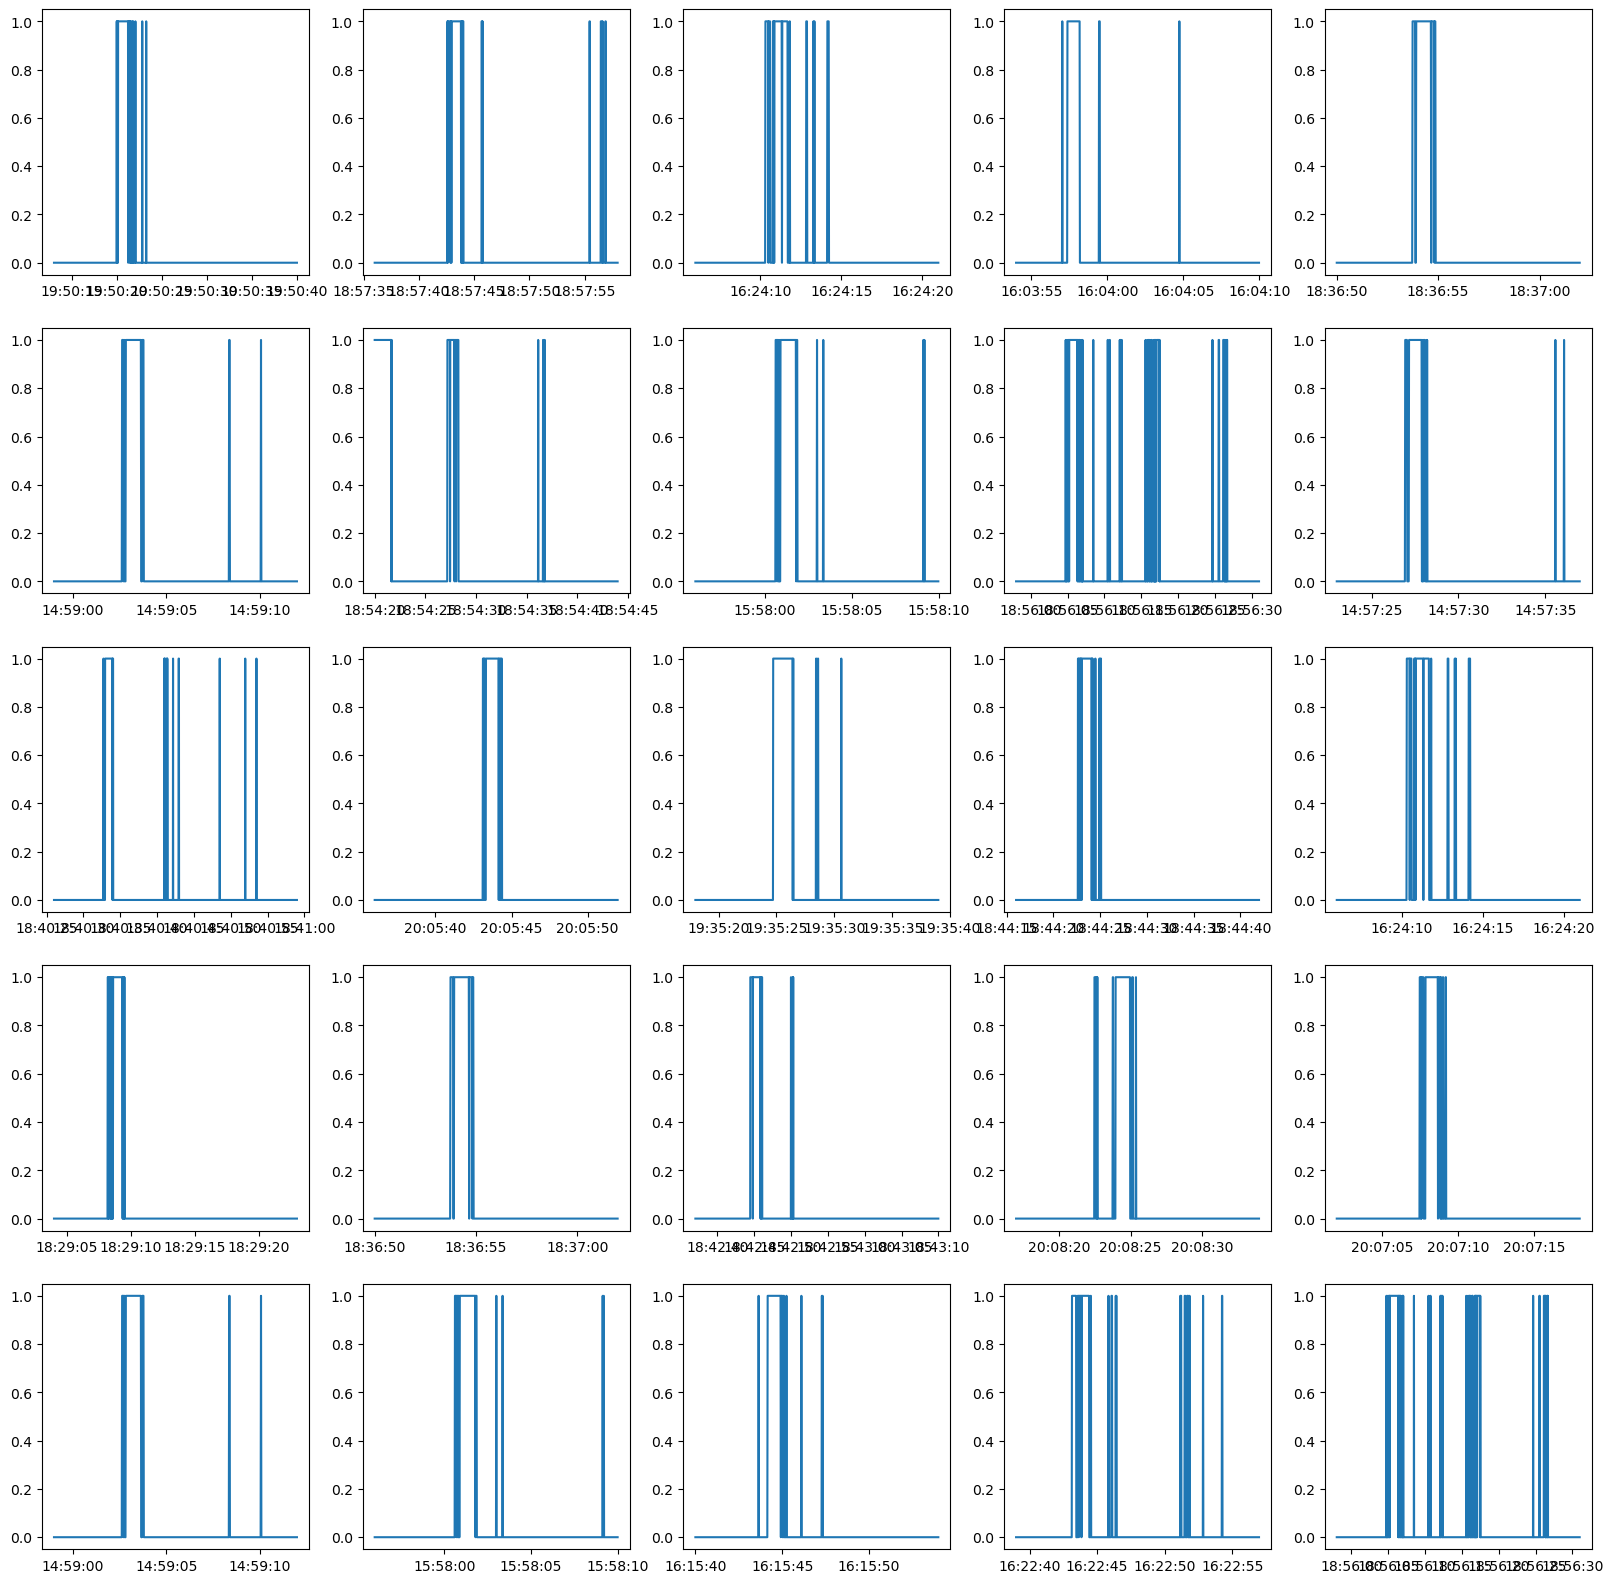

In [67]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i, asset in enumerate(final_test_data.asset_id.unique()):
    roi_data = final_test_data[final_test_data.asset_id == asset].copy()
    # return_on_asset = list(roi_data.return_on_asset)[0]
    roi_data.set_index('timestamp', inplace=True)
    axes.flatten()[i].plot(roi_data.roi)
    # axes.flatten()[i].set_title(return_on_asset)